## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.shape

(41188, 21)

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [5]:
bank_target = df['y'].map({'yes': 1, 'no': 0})
bank_target.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [6]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [7]:
df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']].apply(lambda x: x.unique())

age          [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...
job          [housemaid, services, admin., blue-collar, tec...
marital                   [married, single, divorced, unknown]
education    [basic.4y, high.school, basic.6y, basic.9y, pr...
default                                     [no, unknown, yes]
housing                                     [no, yes, unknown]
loan                                        [no, yes, unknown]
dtype: object

**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [8]:
df['age'].max()

np.int64(98)

In [9]:
df['age'].min()

np.int64(17)

In [10]:
df['age'].isnull().sum()

np.int64(0)

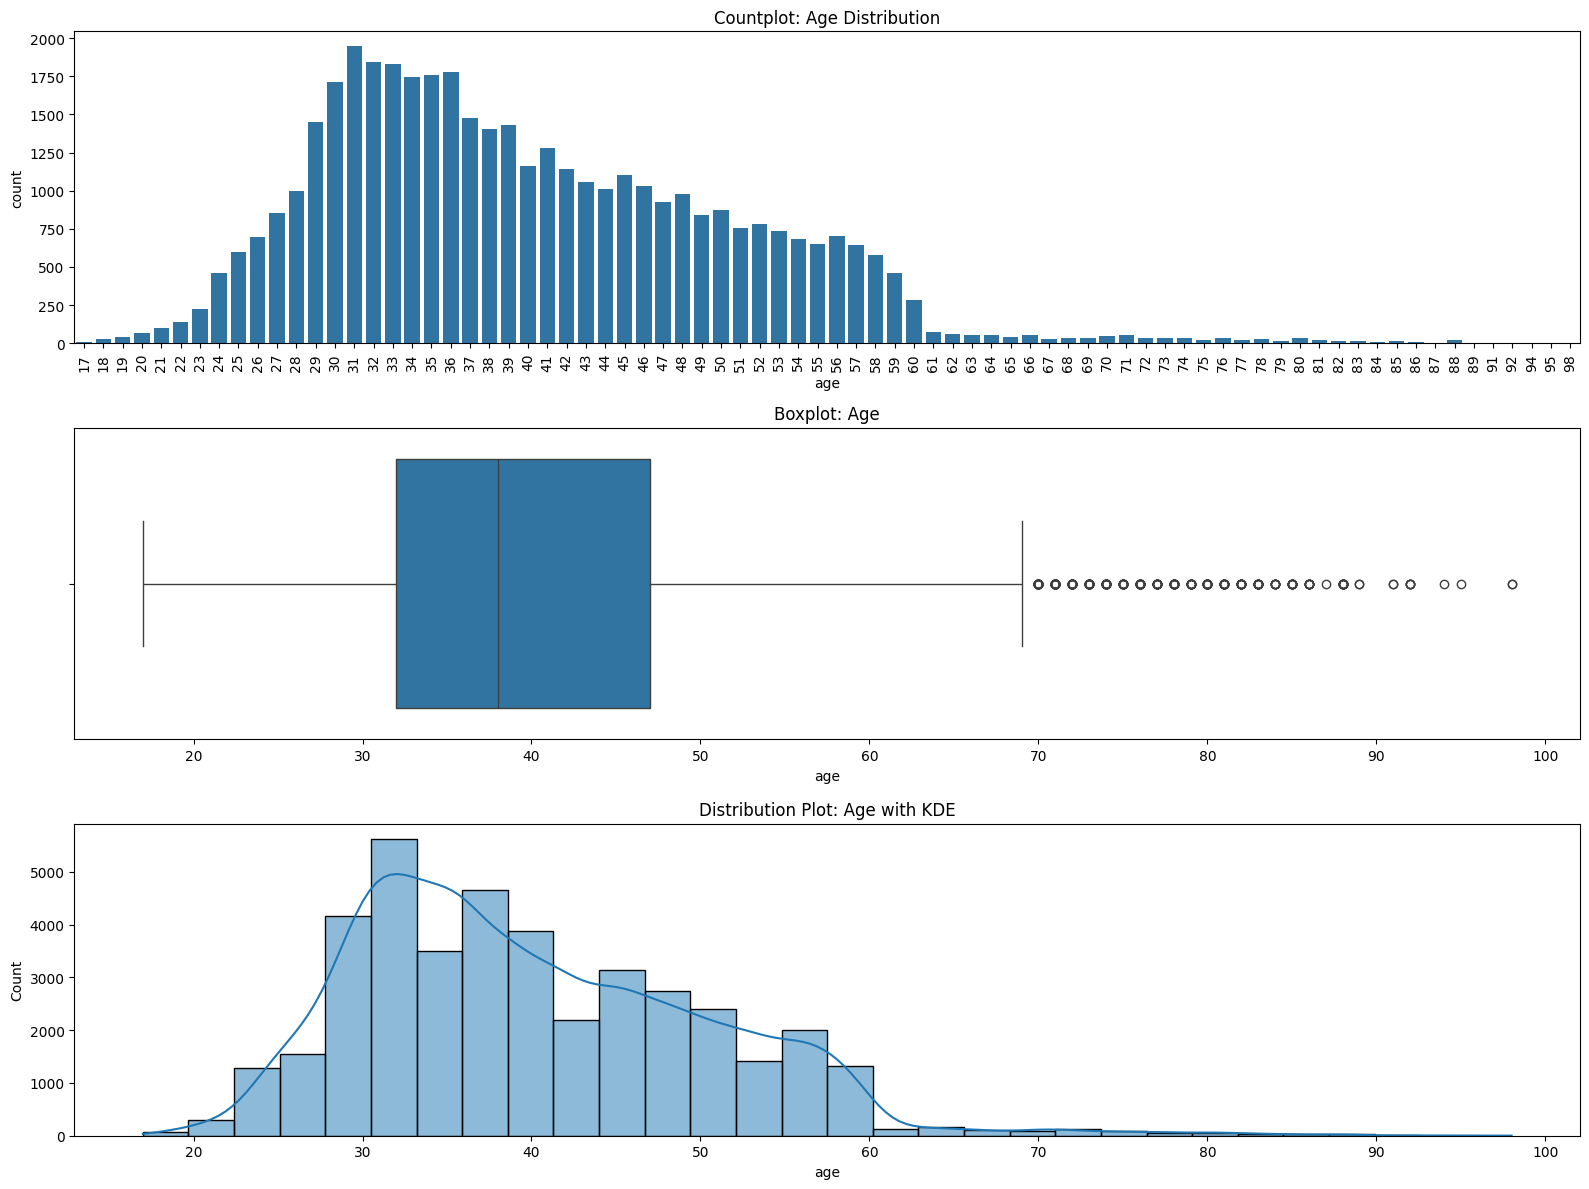

In [11]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
sns.countplot(x='age', data=df)
plt.xticks(rotation=90)
plt.title('Countplot: Age Distribution')

plt.subplot(3, 1, 2)
sns.boxplot(x='age', data=df, orient='h')
plt.title('Boxplot: Age')

plt.subplot(3, 1, 3)
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution Plot: Age with KDE')

plt.tight_layout()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   у першому завданні був зроблений початковий огляд датасету, що містить 41188 записів та 21 змінну. статистична інформація по числових атрибутах дозволила побачити широкий розкид значень, особливо у змінній duration, яка має сильні коливання від 0 до понад 4900. це показує нам значну різноманітність у тривалості взаємодії клієнтів з банком
2.   у другому завданні ми визначили, що цільовим атрибутом є змінна y, яка є категоріальною і вказує, чи підписався клієнт на банківський продукт. для подальшого аналізу її було перетворено у числовий формат. значення “yes” закодовано як 1, а “no” як 0
3.  у третьому завданні було виділено змінні, які безпосередньо описують клієнтів банку: вік, професія, шлюбний статус, освіта, наявність кредитів тощо. для кожного атрибута проаналізовано унікальні значення, що дало уявлення про склад респондентів, включно з випадками відсутності даних (unknown)
4.  у четвертому завданні був зробдений аналіз для age. встановлено, що вік клієнтів варіюється від 17 до 98 років, пропущених значень немає. візуалізація показала скупчення у віковому діапазоні 30–40 років та наявність важкого правого хвоста у розподілі, що вказує на наявність значної кількості літніх клієнтів

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [12]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q2 = np.percentile(sorted_data, high_percentile-low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [13]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

у п’ятому завданні був зроблений аналіз для age на наявність викидів методом міжквартильного розмаху з використанням 10-го та 90-го перцентилів. межі були обчислені як Q1 = 28.0 і Q3 = 55.0, а інтерквартильний розмах склав 27.0. на основі цього були визначені граничні значення: нижня межа — -12.5, верхня — 95.5. всі значення, що виходять за ці межі, вважаються викидами. виявлені записи з віком 98 років, які перевищують верхню межу і класифікуються як викиди. ці результати підтверджують наявність літніх клієнтів, які статистично виділяються на фоні основної вибірки, і можуть мати окремий вплив на моделі прогнозування

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

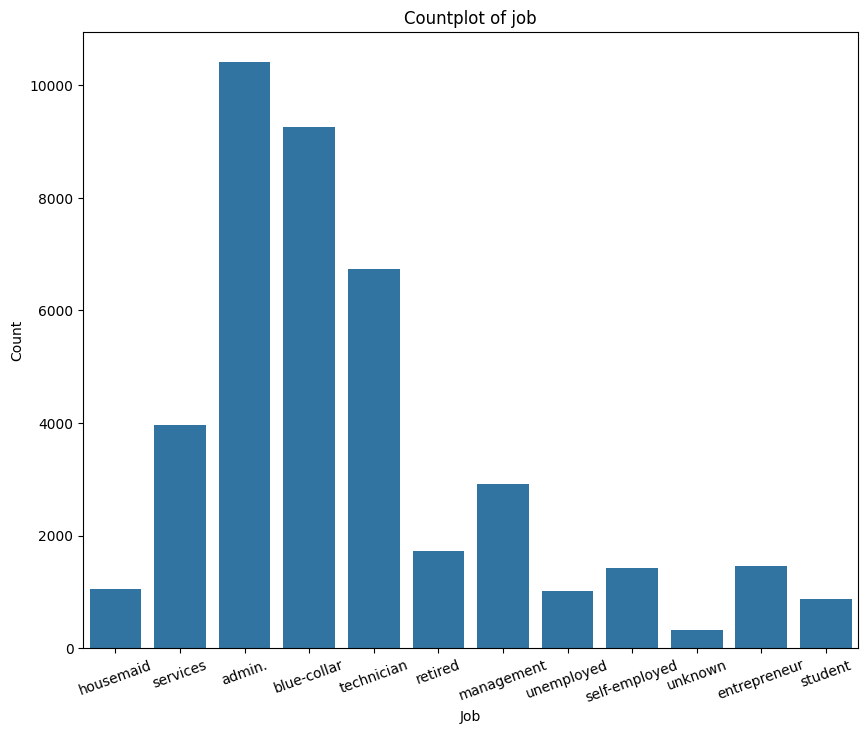

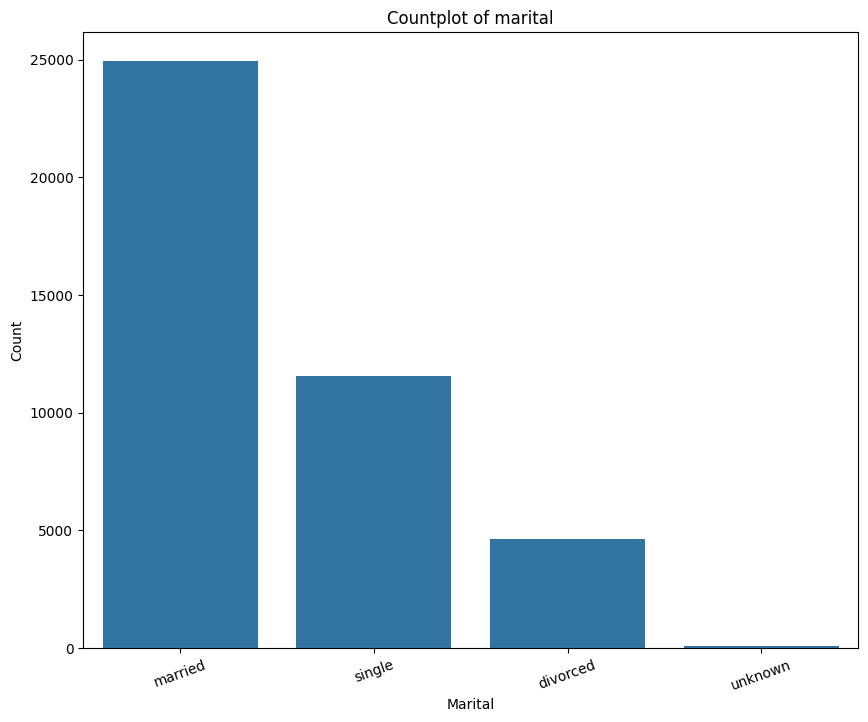

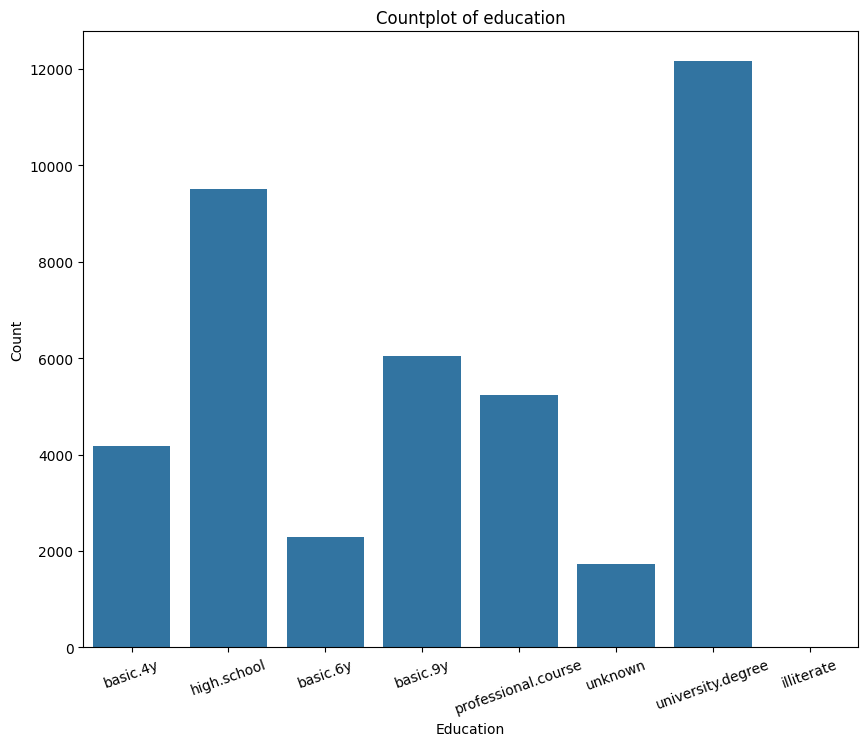

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='job')
plt.title('Countplot of job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='marital')
plt.title('Countplot of marital')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='education')
plt.title('Countplot of education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

**Висновки з завдання 6 (детальні)**

у шостому завданні було виконано візуальний аналіз категоріальних атрибутів job, marital та education, які характеризують соціальний стан клієнтів. графік для змінної job показав, що найбільш поширеними професіями є admin., blue-collar та technician, тоді як найменш представлені student та unknown. у розподілі marital переважає категорія married, що свідчить про більшість клієнтів у сімейних відносинах, далі йдуть single і divorced. аналіз education показав, що найбільша частина клієнтів має вищу освіту (university.degree), за нею середню (high.school)

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

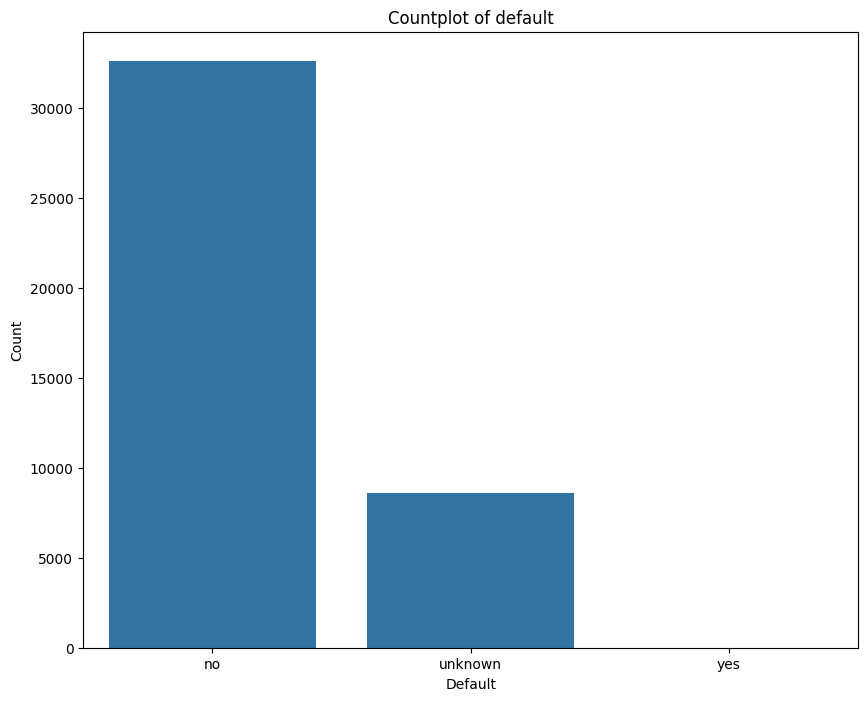

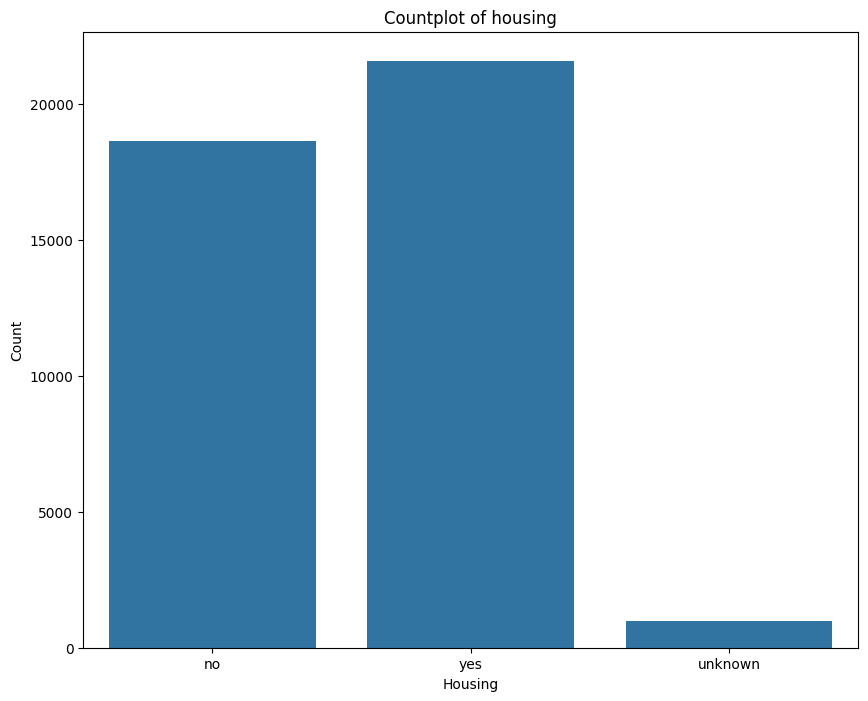

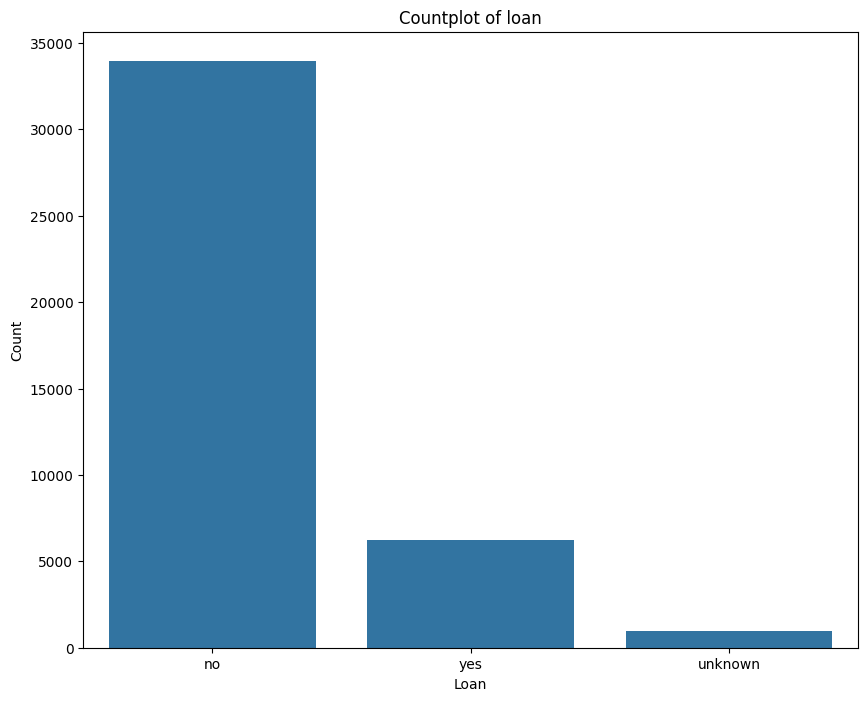

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='default')
plt.title('Countplot of default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='housing')
plt.title('Countplot of housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='loan')
plt.title('Countplot of loan')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [16]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = pd.Series(le.fit_transform(not_null), index=not_null.index)
      
    return df

In [17]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
dataset_copy = encode_categorical_columns(df, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [18]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  dataframe['age_quartile'] = pd.qcut(dataframe[age_col], 4, labels=False)
  dataframe['age_quartile_labels'] = pd.qcut(dataframe[age_col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
          
  return dataframe

In [19]:
bank_client = encode_age(bank_client, 'age')
dataset = encode_age(df, 'age')

print(bank_client[bank_client['age_quartile'] == 1])

       age  job  marital  education  default  housing  loan  age_quartile  \
2       37    7        1          3        0        2     0             1   
14      35    1        1          1        0        2     0             1   
16      35    1        1          1        0        2     0             1   
24      37    0        1          3        0        2     0             1   
25      35    9        1          6        0        0     2             1   
...    ...  ...      ...        ...      ...      ...   ...           ...   
41171   33    8        1          5        0        2     0             1   
41175   34    8        2          7        0        2     0             1   
41176   38    3        0          3        0        2     2             1   
41180   36    0        1          6        0        0     0             1   
41181   37    0        1          6        0        2     0             1   

      age_quartile_labels  
2                      Q2  
14                 

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

у дев’ятому завданні змінну age було трансформовано за допомогою методу qcut, який дозволяє поділити значення на чотири рівні квартилі. для кожного запису було додано дві нові змінні: age_quartile — числова категорія (0, 1, 2, 3), і age_quartile_labels — текстове позначення відповідного квартиля (Q1, Q2, Q3, Q4). аналіз результатів показав, що кодування працює коректно — усі значення віку були класифіковані відповідно до квартильного розподілу

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [20]:
bank_relat = df[['contact', 'month', 'day_of_week', 'duration']]
bank_relat.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [21]:
bank_relat.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [22]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [23]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [24]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



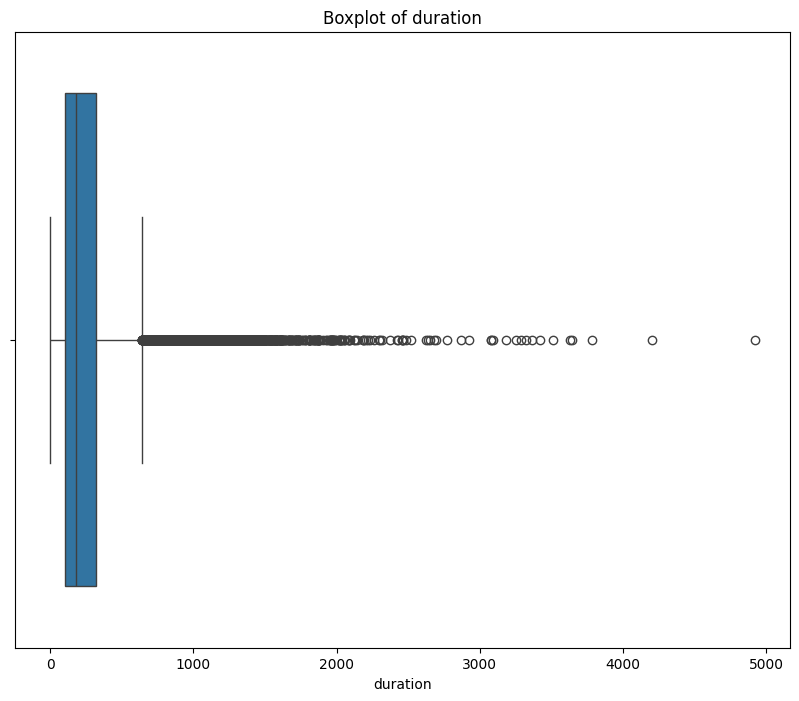

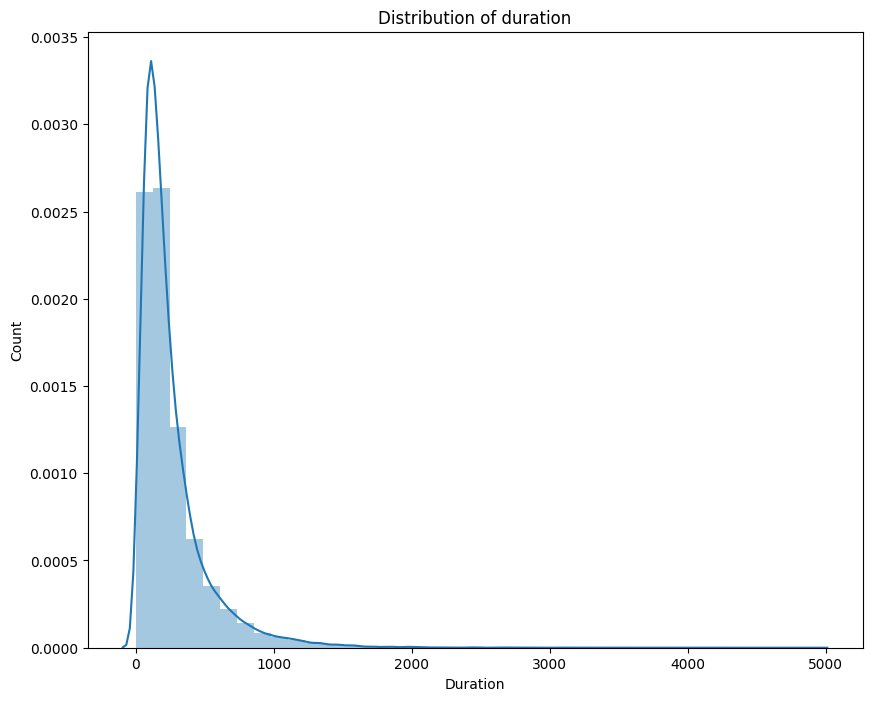

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='duration', data=df)
plt.title('Boxplot of duration')
plt.show()

plt.figure(figsize=(10, 8))
sns.distplot(dataset['duration'], bins=40)
plt.title('Distribution of duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [26]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [27]:
transform_col = encode_categorical_columns(df, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [28]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  dataframe['duration_quartile'] = pd.qcut(dataframe[duration_col], 4, labels=False)
  dataframe['duration_quartile_labels'] = pd.qcut(dataframe[duration_col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
          
  return dataframe

In [29]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [30]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_socec.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [31]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]
bank_other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [32]:
transform_poutcome = encode_categorical_columns(dataset, ['poutcome'])

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [33]:
bank_final = dataset[['contact', 'month', 'day_of_week', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_final.head()

,contact,month,day_of_week,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,6,1,56,3,1,0,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,1,6,1,57,7,1,3,1,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,1,6,1,37,7,1,3,0,2,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,1,6,1,40,0,1,1,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,1,6,1,56,7,1,3,0,0,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


**Завдання 19** Провести ділення вибірки

In [34]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [35]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, df['y'], 0.2, 10, 101)

In [36]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [37]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [38]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7188   91]
 [ 754  205]]
90.0


## k-NN

k=1 85.04 (+/- 0.88)
k=2 89.07 (+/- 0.57)
k=3 88.47 (+/- 0.49)
k=4 89.49 (+/- 0.56)
k=5 89.36 (+/- 0.65)
k=6 89.67 (+/- 0.63)
k=7 89.68 (+/- 0.69)
k=8 89.79 (+/- 0.69)
k=9 89.77 (+/- 0.73)
k=10 89.83 (+/- 0.76)
k=11 89.80 (+/- 0.71)
k=12 89.95 (+/- 0.69)
k=13 89.84 (+/- 0.67)
k=14 89.94 (+/- 0.66)
k=15 89.88 (+/- 0.69)
k=16 89.94 (+/- 0.69)
k=17 89.91 (+/- 0.63)
k=18 89.92 (+/- 0.68)
k=19 89.88 (+/- 0.73)
k=20 89.92 (+/- 0.67)
k=21 89.91 (+/- 0.67)
k=22 89.90 (+/- 0.66)
k=23 89.95 (+/- 0.63)
k=24 89.93 (+/- 0.65)
k=25 89.94 (+/- 0.63)
The optimal number of neighbors is 22 with 90.0%


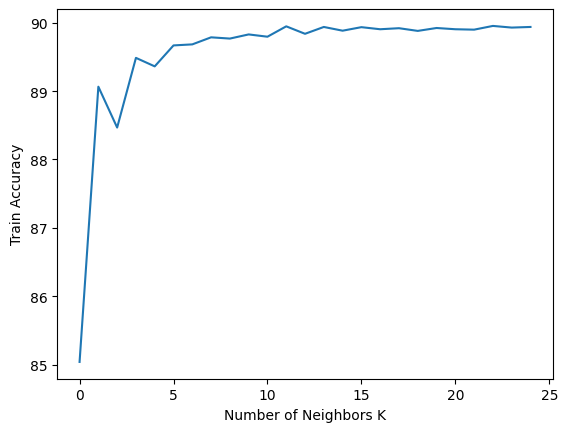

In [39]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7177  102]
 [ 751  208]]
90.0


## Логістична Регресія

In [41]:
models = pd.DataFrame({
                'Models': ['LOGCV', 'KNNCV'],
                'Score':  ['LOGCV', 'KNNCV']})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LOGCV,LOGCV
1,KNNCV,KNNCV


**Висновки по моделям (детальні)**

у результаті побудови логістичної регресії було досягнуто точності 91% на тестовій вибірці, а середня точність за крос-валідацією склала 90.9%. модель добре передбачає цільову змінну та показала стабільні результати. це свідчить про те, що логістична регресія є ефективною базовою моделлю для прогнозування підписки клієнтів на депозит